In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import pandas as pd
from numpy import cos,sin,pi
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [8,8]

from numpy import cos,sin,tan,arctan,exp,log,pi

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz 2 in recitation this week. 
    - Lines and planes and products
  - Homework 3 posted, due 2/11    

# One-minute Review

A **space curve** is a vector-function of a scalar $$\vec r(t) = x(t)\vec i + y(t) \vec j + z(t) \vec k.$$ 

The derivative $$\vec r'(t) = x'(t)\vec i + y'(t) \vec j + z'(t) \vec k$$ is the **tangent vector** to the curve. 

In [5]:
r1 = lambda t: np.array([t,t**2,t**3])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),t])
r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact
def _(t=(-1,1,.05),r={"twist":r1, "helix": r2, "wacky": r3},angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(-1,1,300)
    ax.view_init(vangle, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y,Z = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')
    ax.plot(X,Y,Z,alpha=1,lw=3);
    ax.quiver(0,0,0,r(t)[0],r(t)[1],r(t)[2])
    v,w =[r(t),(r(t+.01)-r(t-.01))/.07]
    ax.quiver(v[0],v[1],v[2],w[0],w[1],w[2],color='r')

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), Dropdown(descript…

### Example

Parametrize the curve of the intersection of the cylinder $x^2 +y^2 =4 $ and the plane $x-2y+z=4$.

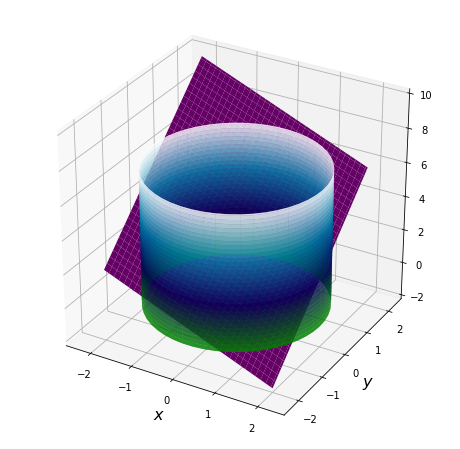

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = y = np.linspace(-1,1,101)
x,y = np.meshgrid(x,y)
X = 2*cos(2*pi*x)
Y = 2*sin(2*pi*x)
Z = 4*y+3
ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean');
X = 2*x
Y = 2*y
Z = 4-X+2*Y
ax.plot_surface(X,Y,Z,alpha=1,color='purple')
for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2.5,2.5]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
ax.set_zlim=([0,8])

# Lecture 06

  - Objectives

    - Describe motion of objects using calculus of curves.
    - Compute arc length of curves.
    - Explain thquantity $\kappa$, the curvature.
  
  - Resources
    - Content
      - Stewart: §13.3-4
      - New Strang: [§3.3](https://cnx.org/contents/oxzXkyFi@5.30:9fEOYsBF@9/3-3-Arc-Length-and-Curvature) [§3.4]()
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L06.ipynb) via JupyterHub
    - Visualization
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
    - Practice
      - Mooculus: [Motion and Paths in Space](https://ximera.osu.edu/mooculus/calculus3/motionAndPathsInSpace/titlePage)
    - Extras
      - CalcBLUE: [Vector Calculus and Motion](https://www.youtube.com/watch?v=rq4kxVFnOUA&index=48&list=PL8erL0pXF3JYm7VaTdKDaWc8Q3FuP8Sa7)

## Smoothness

A differentiable curve $\vec r (t)$ is said to be **smooth** provided for all $t$, $|\vec r'(t)| \neq 0$.


For such surves we define the **unit tangent vector** $$T(t) = \frac{\vec r'(t)}{|\vec r'(t)|}.$$

In [7]:
r = lambda t: np.array([t**2,t**3])
dr = lambda t: np.array([2*t,3*t**2])


@interact
def _(h=(-1,1,.05)):
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    s = np.linspace(-1,1,300)
    ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot(X,Y,alpha=1,lw=3);
    ax.plot([-1,1],[0,0],'k')
    ax.plot([0,0],[-1,1],'k')
    ax.set_title("Differentiable but not smooth")
    v = r(h)-r(0)
    ax.quiver(r(h)[0],r(h)[1],h!=0 and dr(h)[0]/np.linalg.norm(dr(h)) or 0,h!=0 and dr(h)[1]/np.linalg.norm(dr(h)) or 0,angles='xy', scale_units='xy', scale=1)

interactive(children=(FloatSlider(value=0.0, description='h', max=1.0, min=-1.0, step=0.05), Output()), _dom_c…

## Integration

Integrals are limits of sums. Vectors can be added and scaled, so this definition also goes right through, though the interpretation is less clear.

$$\int_a^b \vec r(t)\,dt = \lim_{N\to\infty} \sum_{i=1}^N \vec r(t_i^*) \,\Delta t$$

$$ = \left\langle \int_a^b x(t)\,dt, \int_a^b y(t)\,dt ,\int_a^b z(t)\,dt \right\rangle$$ in components. 


Note the integral is a **vector**, not an "area".

## Fundamental Theorem

$$\vec r(t) = \vec r(a) + \int_a^t \vec r'(\tau)\,d\tau$$  

# Motion in Space

A fundamental application of vector-valued function is describing motion in space. Suppose the **position** of a particle in space is given by $\vec r(t)$. Its derivative $\vec r'(t) = \vec v(t)$ is called the **velocity**, and its second derivative $\vec r''(t) = \vec a(t)$ is the **acceleration**. **Speed** is the magnitude of velocity $v = |\vec v(t)|$.

$$\vec a(t) = \vec v'(t) = \vec r''(t) $$

You are likely familiar with Newton's Second Law of motion $$\vec F = m \,\vec a.$$



### Quick example

A force applied perpendicular to an object's velocity cannot change its speed. 

If $\vec a\cdot \vec v = 0$,
$$\frac{d}{dt} |\vec r'(t)|^2 = \frac{d}{dt} (\vec r'(t)\cdot \vec r'(t) ) = 2\vec r''(t)\cdot \vec r'(t) = 0$$

In [12]:
# range of a projectile launched from the ground with angle alpha and speed v ft/sec

@interact
def _(alpha = (0,pi/2),v=(0,100)):
    x=np.linspace(0,10,101)
    plt.plot(v*cos(alpha)*x,v*sin(alpha)*x-32*x**2/2)
    plt.ylim([0,160])
    plt.xlim([0,350])

interactive(children=(FloatSlider(value=0.7853981633974483, description='alpha', max=1.5707963267948966), IntS…

## Example

A particle initially at rest at the origin is subjected to an acceleration $$\vec a(t) = \begin{cases} \vec i -  t\,\vec j, & t\leq 6 \\ \vec 0, & t > 6 \end{cases}.$$ Find its position at $t=10$.

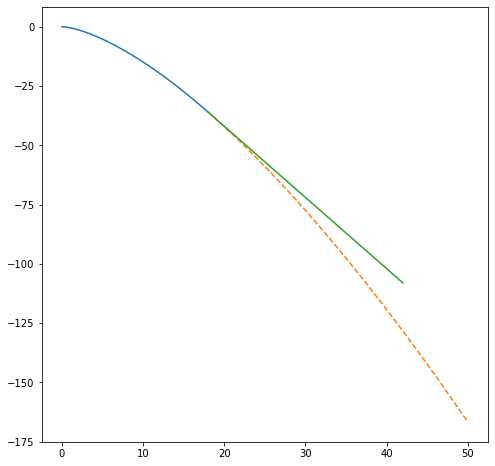

In [9]:
t = np.linspace(0,6,201)
plt.plot(1/2*t**2,-t**3/6)
t = np.linspace(6,10,201)
plt.plot(1/2*t**2,-t**3/6,'--')
plt.plot(18 + 6*(t-6),-36 - 18*(t-6),'-');


# Arc Length

Most have an intuition for what is meant by the length of a curving path. But carefully formulating it gives rise rather quickly to a fundamental formula.

In [14]:
r = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),sin(6*pi*t)])

@interact
def _(n=(1,100,5),angle=(-30,120,6)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(0,1,300)
    ax.view_init(30, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y,Z = np.column_stack([r(x) for x in s])
    ax.plot(X,Y,Z,alpha=1,lw=3);
    s = np.linspace(0,1,n+1)
    X,Y,Z = np.column_stack([r(x) for x in s])
    ax.plot(X,Y,Z,alpha=1,lw=3);
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')


interactive(children=(IntSlider(value=46, description='n', min=1, step=5), IntSlider(value=42, description='an…

## Arc Length

So a reasonable approximation is 

$$\sum_{i=1}^n |\vec r(a + i \Delta t) - \vec r(a+(i-1)\Delta t)|$$ 

$$ = \sum_{i=1}^n \left|\frac{\vec r(t + i \Delta t) - \vec r(t+(i-1)\Delta t)}{\Delta t}\right| \Delta t $$ since $\Delta t >0$.

$$ \longrightarrow \int_a^b |\vec r'(t)|\,dt$$


### Example

Find the arc length of one coil of the helix $$\cos t\,\vec i + \sin t\,\vec j + t\,\vec k.$$

## Reparametrization

The same path in space can be traced in any number of ways—fast, slow, backwards. The process of changing this is called **reparametrization**. In effect, we replace the argument to a curve $\vec r(t)$ with a different scalar-valued function to make $\vec r(f(t))$.

#### Quick example

$\langle \cos t, \sin t\rangle$ traces out the unit circle over the interval $[0,2\pi]$.

$\langle \cos (16\pi t), \sin (16\pi t)\rangle$ traces out the unit circle much "faster", over the interval $[0,0.125]$.

Take the derivatives of each of the above to see this.

### Parametrization by arc length

Let $\vec r(t)$ for $t\in[a,b]$ be a smooth (i.e., $|\vec r'(t)| \neq 0$) curve. Let $$s(t) = \int_a^t |\vec r'(\tau)|\,d\tau$$ be the arc length function. Note:

  - $L = s(b)$ is the length of the curve. 

  - $\frac{ds}{dt} = |\vec r'(t)|$.

  - $s(t)$ is monotonically increasing, thus invertible. We write $\vec r(s)$ for $s\in [0,L]$ to be this curve **parametrized by arc length**.

  - $\vec r'(t) = \frac{d\vec r}{ds} \frac{ds}{dt}$

  - $\vec T = \frac{d\vec r}{ds} =\frac{\vec r'(t)}{|\vec r'(t)|}$ is a unit vector. 

### Example

Parametrize the curve $$\langle e^{-t}, 1-2e^-t, 2e^{-t} \rangle$$ for $t \geq 0$ by arc length. 

## Curvature

Which of these curves is "curviest"?

In [11]:
r1 = lambda t: np.array([t,2*t,-t])
r2 = lambda t: np.array([t*cos(2*pi*t),t*sin(2*pi*t),t/4])
r3 = lambda t: np.array([cos(pi*t),sin(pi*t),t])

@interact
def _(angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(-1,1,300)
    ax.view_init(vangle, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')
    for i,r in enumerate((r1,r2,r3)):
        X,Y,Z = np.column_stack([r(x) for x in s])
        ax.plot(X,Y,Z,alpha=1,lw=3,label=f"curve {i+1}");
#     v,w =[r(t),(r(t+.01)-r(t-.01))/.07]
    ax.legend()


interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

#### Definition of curvature

Recall that $\vec T$ is the **unit tangent vector** to a curve $\vec r(t)$. The **curvature** $\kappa$ of $\vec r$ at a given point is given by $$\kappa = \left|\frac{d\vec T}{ds} \right|.$$

##### Formula

Perhaps a more useful formula comes from $\vec T'(t) = \frac{d\vec T}{ds} \frac{ds}{dt} $, or 

$$\kappa = \frac{|T'(t)|}{|\vec r'(t)|}.$$

### Example

Find the curvature of a circle of radius $a$. 